### Clasificación desgaste de materiales

##### Fabio Martínez
##### Camilo Gonzalez
##### Cristian Viafara

##### Universidad Industrial de Santander

Primero: leer los datos de severo y moderado ubicados en dos diferentes carpetas. 

In [1]:
import numpy as np
import os
import sys
import tarfile
from skimage import io
import matplotlib.pyplot as plt

path_severo = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/SEVERO/'
path_moderado = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/MODERADO/'
images_moderado = os.listdir(path_moderado)
images_severo = os.listdir(path_severo)

print(len(images_severo))
print(len(images_moderado))
print(images_severo)

29
21
['MCI-SiC8.TIF', 'MCI-SiC11.TIF', 'MCI-SiC12.TIF', 'MCI-SiC4.TIF', 'MartWCI-GARNET5.TIF', 'MartWCI-GARNET2.TIF', 'MCI-SiC13.TIF', 'MartWCI-GARNET8.TIF', 'MCI-GARNET1.TIF', 'MCI-GARNET2.TIF', 'MartWCI-GARNET6.TIF', 'MCI-GARNET7.TIF', 'MCI-GARNET4.TIF', 'MCI-SiC9.TIF', 'MCI-GARNET5.TIF', 'MartWCI-GARNET7.TIF', 'MartWCI-GARNET4.TIF', 'MartWCI-GARNET3.TIF', 'MCI-SiC7.TIF', 'MCI-GARNET6.TIF', 'MCI-SiC10.TIF', 'MCI-SiC3.TIF', 'MCI-SiC5.TIF', 'MCI-GARNET3.TIF', 'MCI-SiC6.TIF', 'MCI-SiC1.TIF', 'MCI-SiC2.TIF', 'MCI-SiC14.TIF', 'MartWCI-GARNET1.TIF']


In [2]:
!pwd

/home/fmartinezc/main/research/code/2018-wear-paper-WOM


### Algunos ejemplos visuales



In [3]:
import numpy as np
import random

def select_samples(data_folders, sample_size):
    from skimage import io
    image_files = os.listdir(data_folders)
    image_sample = random.sample(image_files, sample_size)
    return image_sample

In [4]:
def print_sample_img(data_folders, image_sample, name_img):
    fig = plt.figure(figsize=(140,200))
    for i in range(len(image_sample)):
        ax=fig.add_subplot(1, 3, i+1)
        image_file = os.path.join(data_folders, image_sample[i])
        img = io.imread(image_file)
        plt.imshow(img,  cmap = plt.cm.Greys_r)
        plt.savefig(name_img)



In [5]:
image_sample_mod = select_samples(path_moderado,3)
image_sample_sev = select_samples(path_severo,3)
print('image_sample_mod: ', image_sample_mod)
print('image_sample_sev: ', image_sample_sev)

image_sample_mod:  ['AustWCI-GLASS2.TIF', '13CrWCI-GLASS9.TIF', '13CrWCI-GLASS3.TIF']
image_sample_sev:  ['MartWCI-GARNET2.TIF', 'MCI-SiC2.TIF', 'MartWCI-GARNET4.TIF']


In [6]:
image_sample_sev = select_samples(path_severo,3)
print('image_sample_sev: ', image_sample_sev)

image_sample_sev:  ['MCI-SiC5.TIF', 'MCI-GARNET3.TIF', 'MartWCI-GARNET4.TIF']


In [7]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.feature import hog
from skimage import data, exposure

def print_sample_hog(data_folders, image_sample, name_img):
    fig = plt.figure(figsize=(140,200))#
    for i in range(len(image_sample)):
        ax=fig.add_subplot(1, 3, i+1)
        image_file = os.path.join(data_folders, image_sample[i])
        img = io.imread(image_file)
        fd, hog_image = hog(img, orientations=64, pixels_per_cell=(32, 32),
                            cells_per_block=(1, 1), block_norm="L2-Hys", visualize=True, multichannel=False)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        plt.imshow(hog_image_rescaled,  cmap = plt.cm.Greys_r)
        #plt.savefig(name_img)

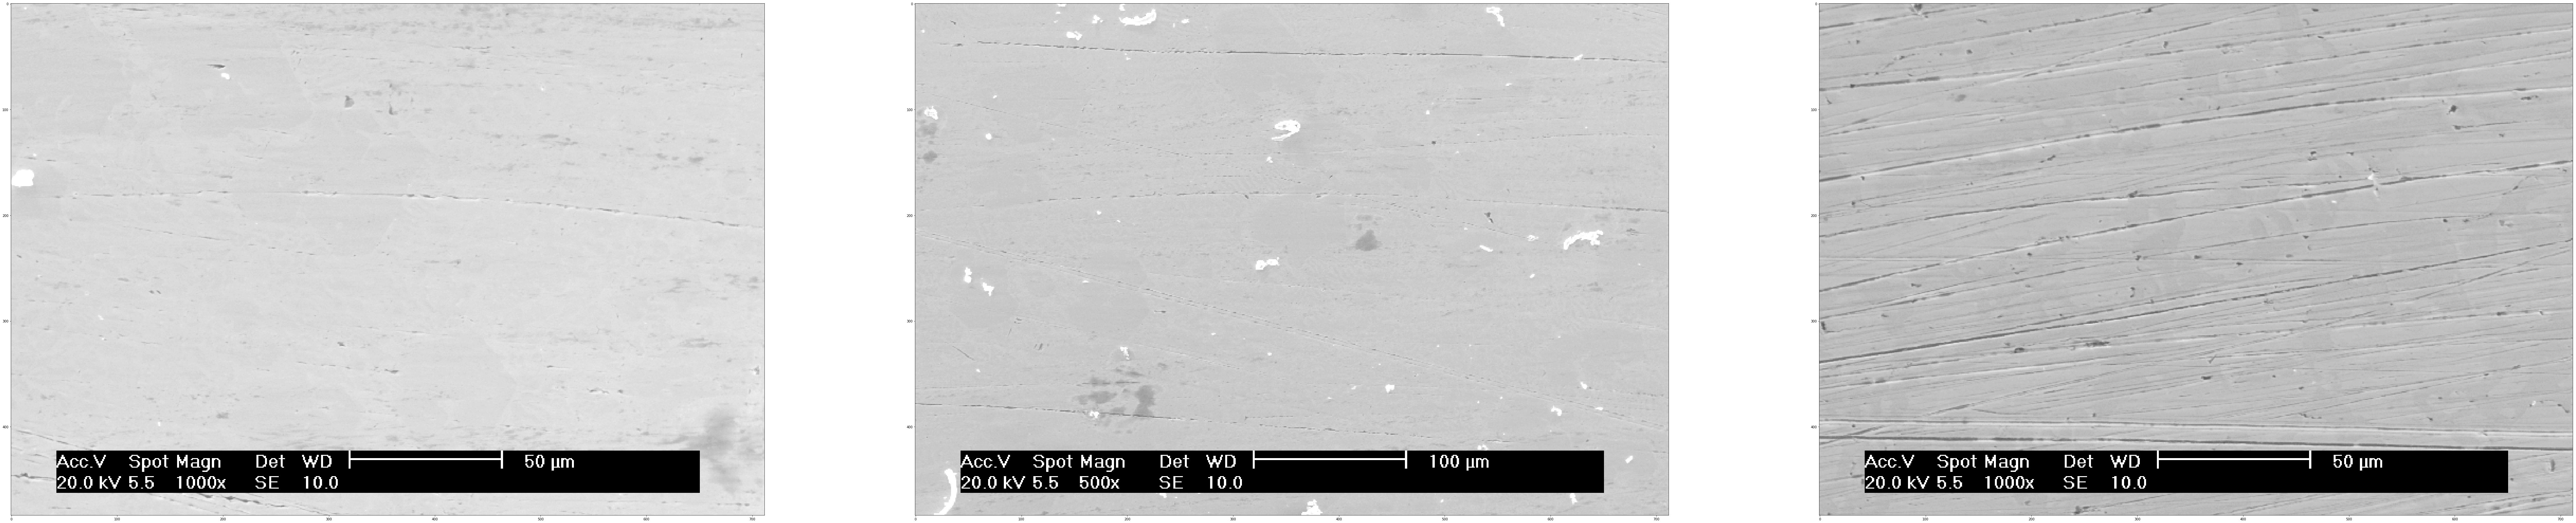

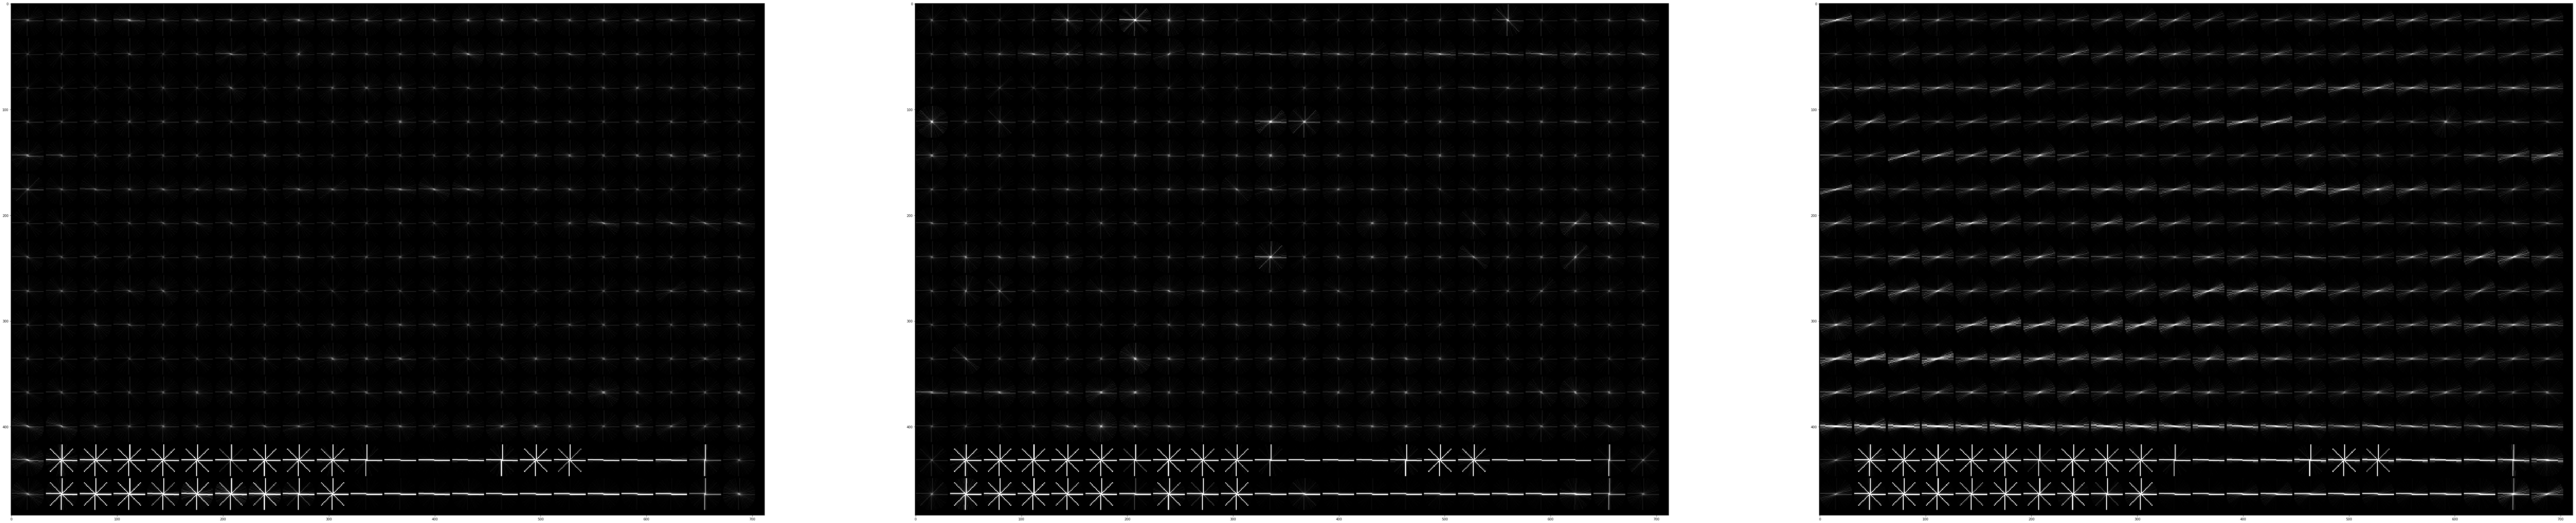

In [20]:
print_sample_img(path_moderado, image_sample_mod, 'moderado-o8c32-b1.png')
print_sample_hog(path_moderado, image_sample_mod, 'moderado_hog-o64-c32-b1.png')

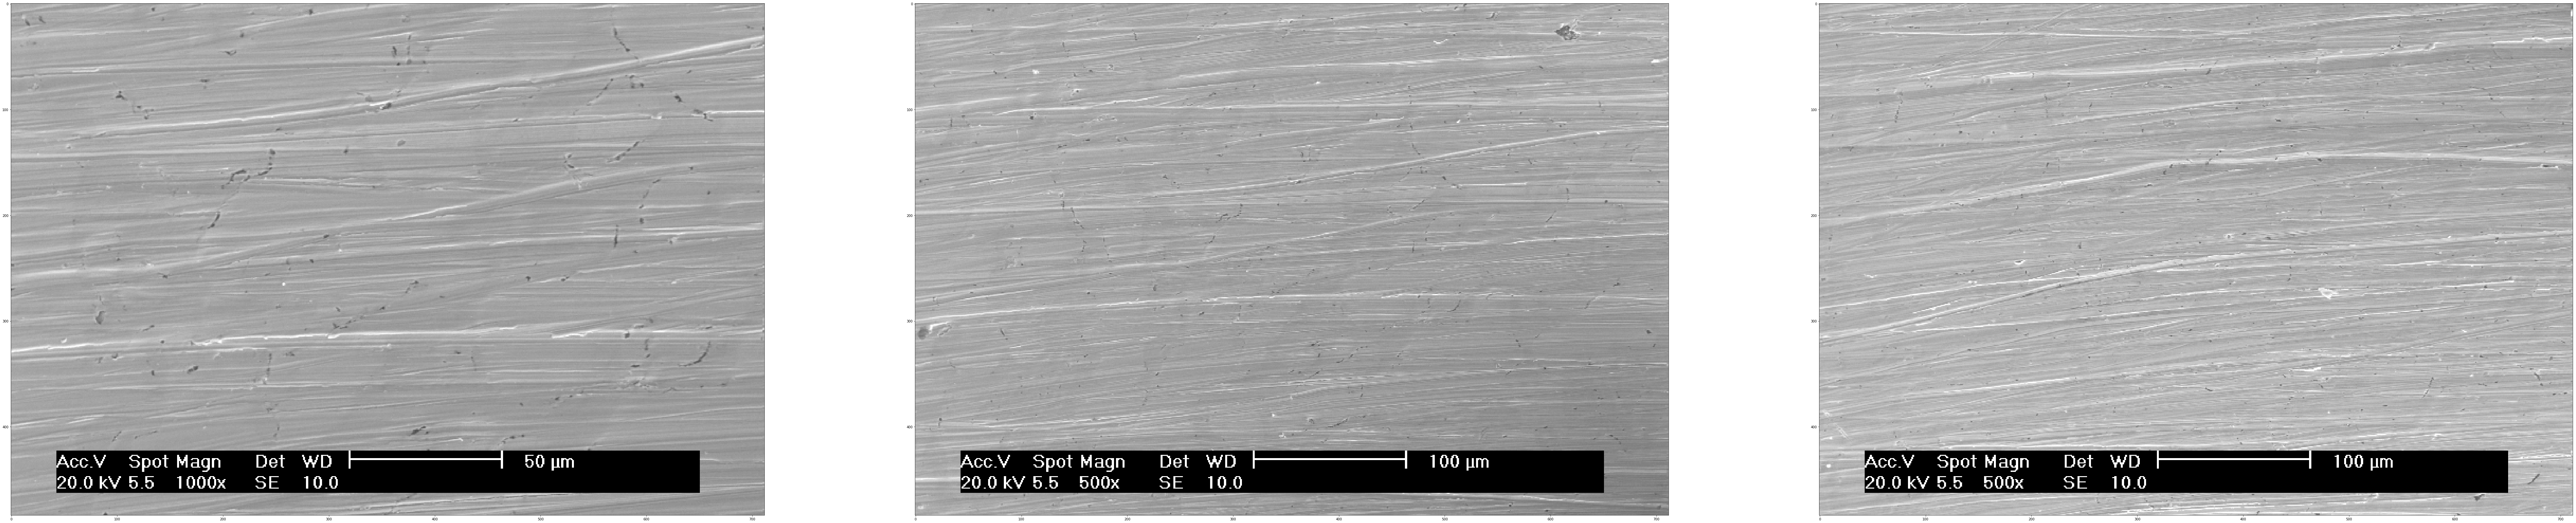

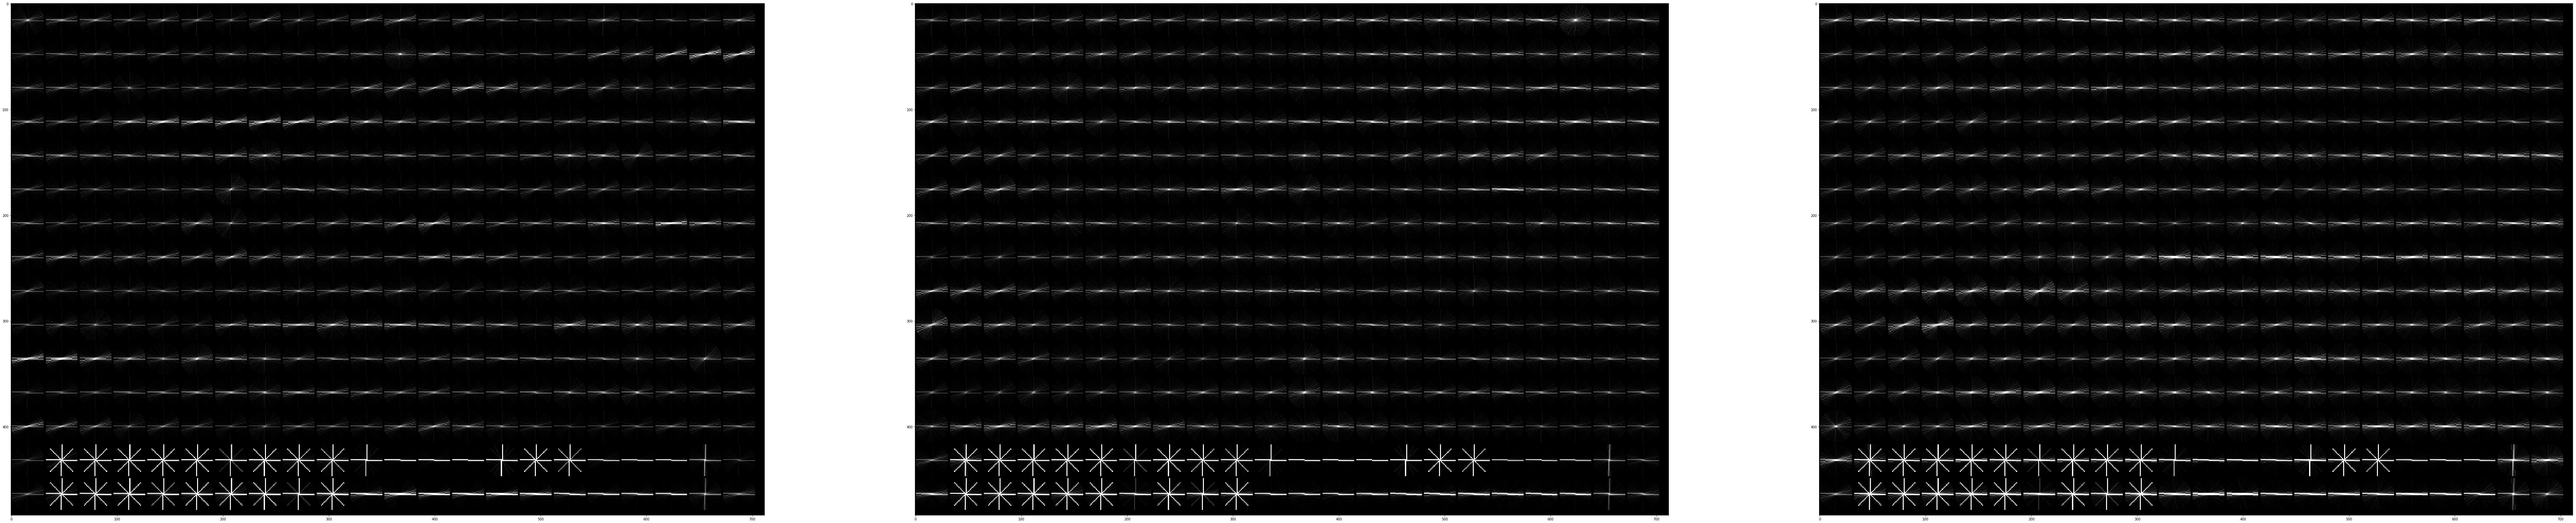

In [21]:

print_sample_img(path_severo, image_sample_sev, 'severo-o8c32-b1.png')
print_sample_hog(path_severo, image_sample_sev, 'severo_hog-o64c32-b1.png')

https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

#  Cálculo del descriptor de HOG y etiquetas

In [8]:
# Hog descriptor computation
#X, y = Hog_wear(moderate, severe, orient_iter, iter_pix_cell, iter_cell_block)
print(len(images_severo))
print(len(images_moderado))

def Hog_wear(orient_iter, iter_pix_cell, iter_cell_block, p_moderado=images_moderado, p_severo=images_severo):
    from skimage import io
    import matplotlib.pyplot as plt
    import numpy as np
    from skimage import color
    from skimage.feature import hog
    %matplotlib inline

    X=[] # descriptor

    #moderado
    for image_path in p_moderado:
        image_file = os.path.join(path_moderado, image_path)
        image = color.rgb2gray(io.imread(image_file))
        fd = hog(image, orientations=orient_iter, pixels_per_cell=(iter_pix_cell, iter_pix_cell),
                 cells_per_block=(iter_cell_block, iter_cell_block), block_norm="L2-Hys")
        X.append(fd)
    #X = np.vstack(X,fd) 

    #severo
    for image_path in p_severo:
        image_file = os.path.join(path_severo, image_path)
        image = color.rgb2gray(io.imread(image_file))
        fd = hog(image, orientations=orient_iter, pixels_per_cell=(iter_pix_cell, iter_pix_cell),
                 cells_per_block=(iter_cell_block, iter_cell_block), block_norm="L2-Hys")
        X.append(fd)
    
    X = np.r_[X]
    y=[]

    lab_mod = np.zeros(len(images_moderado)).astype(int).transpose()
    lab_sev = np.ones(len(images_severo)).astype(int).transpose()
    y = np.concatenate( (lab_mod, lab_sev), axis=0)
    y = np.r_[y]
    #print("X.shape: ", X.shape, " y.shape: ", y.shape)
    #print(type(X))
    return X, y

29
21


In [9]:
X, y = Hog_wear(8, 16, 3)
print("X.shape: ", X.shape, " y.shape: ", y.shape)

X.shape:  (50, 84672)  y.shape:  (50,)


###### Datos en memoria y archivos de texto
se guarda en dos diferentes vectores. Los datos son escritos en un archivo de texto y también pueden estar disponibles en RAM

## Metodos de aprendizaje

#### Test inicial

In [56]:

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator_GNB = GaussianNB()
estimator_DTR =DecisionTreeClassifier()
estimator_SVC = SVC()
estimator_RFC =RandomForestClassifier()

estimator_GNB.fit(X,y)
estimator_DTR.fit(X,y)
estimator_SVC.fit(X,y)
estimator_RFC.fit(X,y)



predictions_GNB = estimator_GNB.predict(X)
predictions_DTR = estimator_DTR.predict(X)
predictions_SVC = estimator_SVC.predict(X)
predictions_RFC = estimator_RFC.predict(X)

In [57]:
from sklearn.metrics import *
print("predictions_GNB %.3f"%accuracy_score(predictions_GNB, y))
print("predictions_DTR %.3f"%accuracy_score(predictions_DTR, y))
print("predictions_SVC %.3f"%accuracy_score(predictions_SVC, y))
print("predictions_RFC %.3f"%accuracy_score(predictions_RFC, y))



predictions_GNB 0.960
predictions_DTR 1.000
predictions_SVC 0.580
predictions_RFC 1.000



## By using cross validations score 

In [58]:
from sklearn.model_selection import KFold

s_GNB = cross_val_score(estimator_GNB, X, y, cv=KFold(12, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_GNB)
print("accuracy s_GNB %.3f (+/- %.5f)"%(np.mean(s_GNB), np.std(s_GNB)))

s_DTR = cross_val_score(estimator_DTR, X, y, cv=KFold(12, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_DTR)
print("accuracy s_DTR %.3f (+/- %.5f)"%(np.mean(s_DTR), np.std(s_DTR)))

s_SVC = cross_val_score(estimator_SVC, X, y, cv=KFold(12, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_SVC)
print("accuracy s_SVC %.3f (+/- %.5f)"%(np.mean(s_SVC), np.std(s_SVC)))

s_RFC = cross_val_score(estimator_RFC, X, y, cv=KFold(12, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_RFC)
print("accuracy s_RFC %.3f (+/- %.5f)"%(np.mean(s_RFC), np.std(s_RFC)))


[0.8  0.4  1.   1.   0.75 1.   1.   0.5  1.   1.   0.75 1.  ]
accuracy s_GNB 0.850 (+/- 0.20514)
[1.   0.6  1.   0.75 0.75 1.   1.   0.5  0.5  0.75 0.75 1.  ]
accuracy s_DTR 0.800 (+/- 0.18930)
[0.4  0.4  0.25 1.   0.5  0.75 0.75 0.5  0.75 0.5  0.5  0.75]
accuracy s_SVC 0.588 (+/- 0.20220)
[1.   1.   0.75 1.   0.5  0.75 1.   1.   1.   0.75 0.75 1.  ]
accuracy s_RFC 0.875 (+/- 0.16137)


In [59]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        print(nfolds, np.mean(s), np.std(s),)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 0.88 0.12
3 0.7818627450980392 0.07009975316703475
4 0.8397435897435898 0.08044807947443033
5 0.76 0.14966629547095767
6 0.8587962962962963 0.10830266264157024
7 0.8188775510204082 0.16654080350968842
8 0.8065476190476191 0.11445764597041318
9 0.8407407407407407 0.16761049628125574
10 0.8799999999999999 0.16
11 0.7681818181818181 0.21455315856738086
12 0.8166666666666668 0.10671873729054747
13 0.782051282051282 0.19485492504577773
14 0.8095238095238095 0.240758909716151
15 0.8166666666666665 0.21559564346591392
16 0.921875 0.1365139835633454
17 0.8627450980392156 0.1640509855949168
18 0.8611111111111112 0.17786456215091248
19 0.7982456140350876 0.22671663128631728


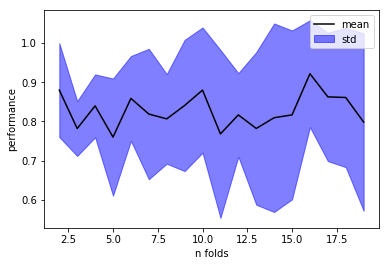

In [60]:
show_curve(RandomForestClassifier())

# Computing with different hog histograms and cell parameters to select best parameters by using a k-fold fix parameter of 12 . 

In [ ]:
from skimage import io
from skimage import color
from skimage.feature import hog

import matplotlib.pyplot as plt
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *



param_orient = [4,8,16,32]
param_pix_cell = [8, 16, 32, 64]
param_cell_block = [1, 2, 4, 8]
estimators   = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier()]
est_files   = ['GaussianNB', 'DecisionTree', 'SVC', 'RandomForest']
nfolds_range = range(2,len(images_severo)+len(images_moderado))



for  num_est, est_i in enumerate(estimators):
    print(est_i, num_est)
    file = open(est_files[num_est]+'.txt', 'w')
    for orient_iter in param_orient:
        for iter_pix_cell in param_pix_cell:
            for iter_cell_block in param_cell_block:            
                # Hog descriptor computation
                print('orient_iter: ', orient_iter, ' iter_pix_cell: ', iter_pix_cell,
                      ' iter_cell_block: ', iter_cell_block)
                X, y = Hog_wear(orient_iter, iter_pix_cell, iter_cell_block)
                print("X.shape: ", X.shape, " y.shape: ", y.shape)
                file.write("%s" % 'o'+str(orient_iter)+'-c'+str(iter_pix_cell)+
                               '-b'+str(iter_cell_block))
                file.write("%s" % ' ')
                    
                for folds in nfolds_range:
                    print('folds: ', folds)
                    s = cross_val_score(est_i, X, y, cv=KFold(folds, shuffle=True),
                                        scoring=make_scorer(accuracy_score))
                    print("accuracy: %.2f (+/- %.2f)"%(np.mean(s), np.std(s)))
                    file.write("%i %.2f %.2f "%(folds, np.mean(s), np.std(s)))
                file.write("\n")
                               

GaussianNB(priors=None) 0
orient_iter:  4  iter_pix_cell:  8  iter_cell_block:  1
X.shape:  (50, 21360)  y.shape:  (50,)
folds:  2
accuracy: 0.60 (+/- 0.08)
folds:  3
accuracy: 0.76 (+/- 0.13)
folds:  4
accuracy: 0.72 (+/- 0.25)
folds:  5
accuracy: 0.84 (+/- 0.12)
folds:  6
accuracy: 0.84 (+/- 0.09)
folds:  7
accuracy: 0.84 (+/- 0.05)
folds:  8
accuracy: 0.84 (+/- 0.17)
folds:  9
accuracy: 0.84 (+/- 0.06)
folds:  10
accuracy: 0.84 (+/- 0.12)
folds:  11
accuracy: 0.84 (+/- 0.16)
folds:  12
accuracy: 0.82 (+/- 0.24)
folds:  13
accuracy: 0.83 (+/- 0.19)
folds:  14
accuracy: 0.85 (+/- 0.17)
folds:  15
accuracy: 0.84 (+/- 0.22)
folds:  16
accuracy: 0.84 (+/- 0.23)
folds:  17
accuracy: 0.84 (+/- 0.26)
folds:  18
accuracy: 0.84 (+/- 0.18)
folds:  19
accuracy: 0.82 (+/- 0.21)
folds:  20
accuracy: 0.82 (+/- 0.22)
folds:  21
accuracy: 0.83 (+/- 0.24)
folds:  22
accuracy: 0.83 (+/- 0.22)
folds:  23
accuracy: 0.83 (+/- 0.24)
folds:  24
accuracy: 0.84 (+/- 0.31)
folds:  25
accuracy: 0.84 (+/- 0.23)